In [1]:
import trainer
import torch
import random
import numpy as np
import os

from dataset import SeismogramDataset
from neural_networks.segnet import SegNet_3Head

In [2]:
seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
ROOT_DIR = os.path.join(os.getcwd())

In [4]:
dataset_path = os.path.join(ROOT_DIR, 'dolfin_adjoint', '2_subdomains')

train_dataset = SeismogramDataset(dataset_path)

In [5]:
from utils import number_of_parameters

model = SegNet_3Head()
number_of_parameters(model)

Total number of parameters: 4567619
Trainable number of parameters: 4567619


In [6]:
model

SegNet_3Head(
  (encoder): Sequential(
    (0): Sequential(
      (0): AdaptiveAvgPool2d(output_size=(128, 128))
      (1): Conv2d(2, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
      (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (3): CELU(alpha=1.0)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
      (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (2): CELU(alpha=1.0)
      (3): Dropout2d(p=0.0, inplace=False)
      (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
      (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (6): CELU(alpha=1.0)
      (7): Dropout2d(p=0.0, inplace=False)
      (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
      (9): InstanceNorm

In [7]:
from trainer import BaseTrainer

# NB: such format for coordinates is required for dolfin_adjoint to 
# pass grads through indexing. Why? God knows

detector_coords = [(np.array([c, 2000.])) for c in np.linspace(0., 2000., 128)]

# TODO: test with nonempty logger
t = BaseTrainer(model, 
                device, 
                train_dataset,
                optimizer_type=torch.optim.Adam,
                optimizer_params={'lr': 1e-3},
                snapshot_interval=250)

Epoch 1 of 100:   0%|          | 0/1 [00:00<?, ?it/s]

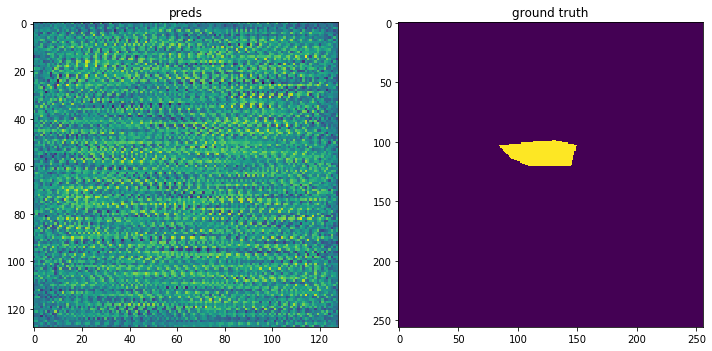



integrating the state problem:   0%|          | 0/199 [00:00<?, ?it/s]

integrating the state problem:  10%|█         | 20/199 [00:01<00:16, 10.59it/s]

integrating the state problem:  20%|██        | 40/199 [00:03<00:14, 10.78it/s]

integrating the state problem:  30%|███       | 60/199 [00:05<00:12, 10.87it/s]

integrating the state problem:  40%|████      | 80/199 [00:07<00:10, 11.01it/s]

integrating the state problem:  50%|█████     | 100/199 [00:09<00:09, 10.79it/s]

integrating the state problem:  60%|██████    | 120/199 [00:11<00:07, 10.57it/s]

integrating the state problem:  70%|███████   | 140/199 [00:12<00:05, 10.95it/s]

integrating the state problem:  80%|████████  | 160/199 [00:14<00:03, 10.78it/s]

integrating the state problem: 100%|██████████| 199/199 [00:18<00:00, 10.78it/s]


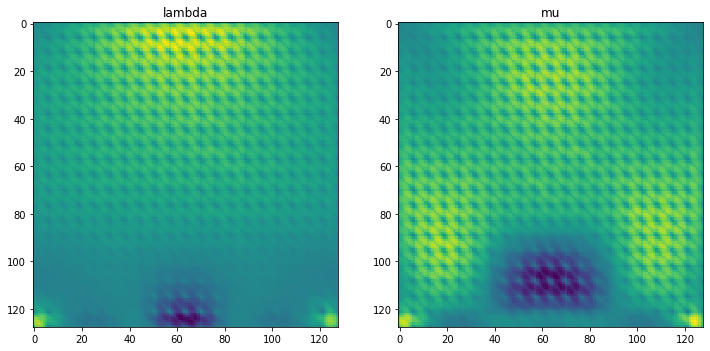


Epoch 2 of 100:   0%|          | 0/1 [00:00<?, ?it/s]

0.4835675270691915


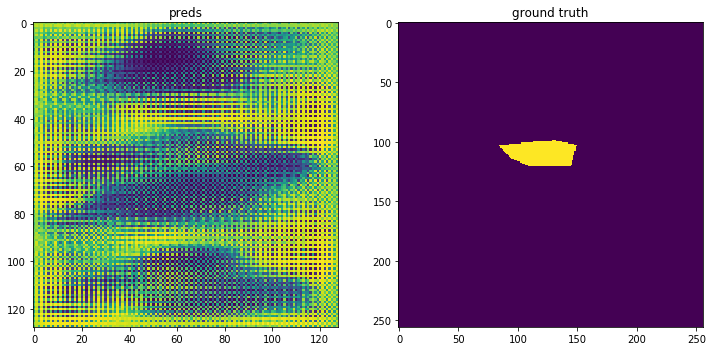



integrating the state problem:   0%|          | 0/199 [00:00<?, ?it/s]

integrating the state problem:  10%|█         | 20/199 [00:01<00:14, 11.97it/s]

integrating the state problem:  20%|██        | 40/199 [00:03<00:13, 12.20it/s]

integrating the state problem:  30%|███       | 60/199 [00:05<00:13, 10.62it/s]

integrating the state problem:  40%|████      | 80/199 [00:07<00:10, 11.01it/s]

integrating the state problem:  50%|█████     | 100/199 [00:08<00:08, 11.16it/s]

integrating the state problem:  60%|██████    | 120/199 [00:11<00:07, 10.35it/s]

integrating the state problem:  70%|███████   | 140/199 [00:12<00:05, 10.76it/s]

integrating the state problem:  80%|████████  | 160/199 [00:14<00:03, 11.13it/s]

integrating the state problem: 100%|██████████| 199/199 [00:18<00:00, 10.81it/s]


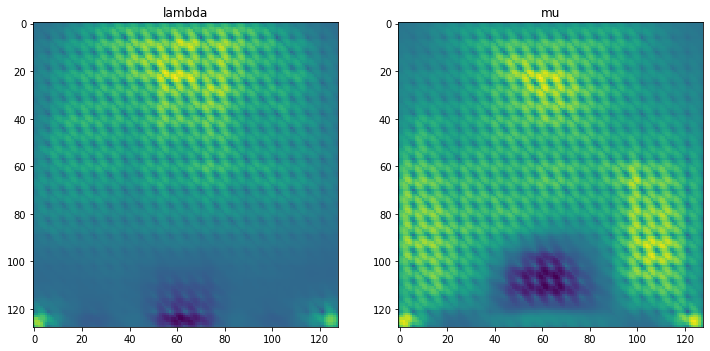


Epoch 3 of 100:   0%|          | 0/1 [00:00<?, ?it/s]

0.4721631187353763


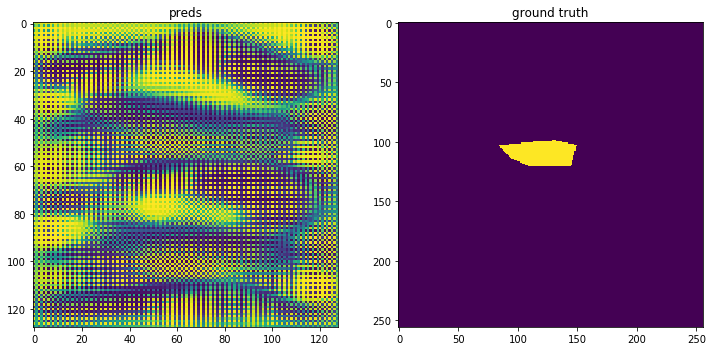



integrating the state problem:   0%|          | 0/199 [00:00<?, ?it/s]

integrating the state problem:  10%|█         | 20/199 [00:01<00:15, 11.27it/s]

integrating the state problem:  20%|██        | 40/199 [00:03<00:13, 11.67it/s]

integrating the state problem:  30%|███       | 60/199 [00:06<00:14,  9.39it/s]

integrating the state problem:  40%|████      | 80/199 [00:07<00:11, 10.22it/s]

integrating the state problem:  50%|█████     | 100/199 [00:09<00:09, 10.69it/s]

integrating the state problem:  60%|██████    | 120/199 [00:11<00:07, 11.01it/s]

integrating the state problem:  70%|███████   | 140/199 [00:12<00:05, 11.20it/s]

integrating the state problem:  80%|████████  | 160/199 [00:14<00:03, 11.33it/s]

integrating the state problem: 100%|██████████| 199/199 [00:18<00:00, 10.59it/s]


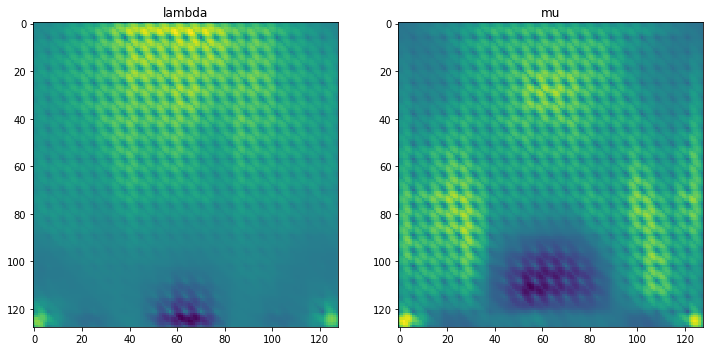


Epoch 4 of 100:   0%|          | 0/1 [00:00<?, ?it/s]

0.4247950002720429


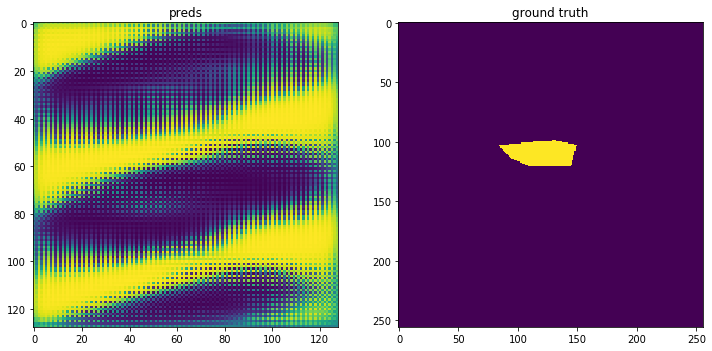



integrating the state problem:   0%|          | 0/199 [00:00<?, ?it/s]

integrating the state problem:  10%|█         | 20/199 [00:01<00:15, 11.36it/s]

integrating the state problem:  20%|██        | 40/199 [00:03<00:13, 11.63it/s]

integrating the state problem:  30%|███       | 60/199 [00:05<00:11, 11.81it/s]

integrating the state problem:  40%|████      | 80/199 [00:08<00:13,  8.62it/s]

integrating the state problem:  50%|█████     | 100/199 [00:10<00:10,  9.51it/s]

integrating the state problem:  60%|██████    | 120/199 [00:11<00:07, 10.21it/s]

integrating the state problem:  70%|███████   | 140/199 [00:13<00:05, 10.71it/s]

integrating the state problem:  80%|████████  | 160/199 [00:15<00:03, 11.11it/s]

integrating the state problem: 100%|██████████| 199/199 [00:18<00:00, 10.66it/s]


In [ ]:
#TODO: test if everything is allright with batch_size > 1
t.train(detector_coords, batch_size=1, epochs=100, num_solver_type='dolfin_adjoint')